In [72]:
# import essential libraries

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


import matplotlib.pyplot as plt
import seaborn as sns

import os
import pickle
import joblib

In [73]:
# import library for normalizing, modeling, evaluate
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, f1_score, auc
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

# EDA

In [74]:
#Reading training and testing data as dataframes
train = pd.read_csv("/Users/jarkrunglerdkriangkrai/ISE/Year 4/Semester 2/DSBA/bankiing/EDA/train.csv",sep =";")
test = pd.read_csv("/Users/jarkrunglerdkriangkrai/ISE/Year 4/Semester 2/DSBA/bankiing/EDA/test.csv", sep =";")
# dataset size
print('Train data size: ', train.shape)
print('Test data size: ', test.shape)

Train data size:  (45211, 17)
Test data size:  (4521, 17)


In [75]:
train.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [76]:
train.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [77]:
test.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [78]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [79]:
print("train", train.duplicated().sum())
print("test", test.duplicated().sum())

train 0
test 0


In [80]:
train.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [81]:
test.describe(include='all')

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
count,4521.000000,4521,4521,4521,4521,4521.000000,4521,4521,4521,4521.000000,4521,4521.000000,4521.000000,4521.000000,4521.000000,4521,4521
unique,NaN,12,3,4,2,NaN,2,2,3,NaN,12,NaN,NaN,NaN,NaN,4,2
top,NaN,management,married,secondary,no,NaN,yes,no,cellular,NaN,may,NaN,NaN,NaN,NaN,unknown,no
freq,NaN,969,2797,2306,4445,NaN,2559,3830,2896,NaN,1398,NaN,NaN,NaN,NaN,3705,4000
mean,41.170095,NaN,NaN,NaN,NaN,1422.657819,NaN,NaN,NaN,15.915284,NaN,263.961292,2.793630,39.766645,0.542579,NaN,NaN
std,10.576211,NaN,NaN,NaN,NaN,3009.638142,NaN,NaN,NaN,8.247667,NaN,259.856633,3.109807,100.121124,1.693562,NaN,NaN
min,19.000000,NaN,NaN,NaN,NaN,-3313.000000,NaN,NaN,NaN,1.000000,NaN,4.000000,1.000000,-1.000000,0.000000,NaN,NaN
25%,33.000000,NaN,NaN,NaN,NaN,69.000000,NaN,NaN,NaN,9.000000,NaN,104.000000,1.000000,-1.000000,0.000000,NaN,NaN
50%,39.000000,NaN,NaN,NaN,NaN,444.000000,NaN,NaN,NaN,16.000000,NaN,185.000000,2.000000,-1.000000,0.000000,NaN,NaN
75%,49.000000,NaN,NaN,NaN,NaN,1480.000000,NaN,NaN,NaN,21.000000,NaN,329.000000,3.000000,-1.000000,0.000000,NaN,NaN


In [82]:
# explore variable
for col in train.columns.values:
    print(f"{20 * '-'}\n{col} \n{20 * '-'}")
    print(train[col].value_counts(), '\n')

--------------------
age 
--------------------
32    2085
31    1996
33    1972
34    1930
35    1894
      ... 
93       2
90       2
95       2
88       2
94       1
Name: age, Length: 77, dtype: int64 

--------------------
job 
--------------------
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64 

--------------------
marital 
--------------------
married     27214
single      12790
divorced     5207
Name: marital, dtype: int64 

--------------------
education 
--------------------
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64 

--------------------
default 
--------------------
no     44396
yes      815
Name: default, dtype: int64 

--------------------
balance 
--------------------
 0 

### There are two data types:

**Numerical Data:** age, balance, day, duration, campaign, pdays, previous

**Categorical Data:**
- job: (blue-collar, management, technician, admin, services, retired, self-employed, entrepreneur, unemployed, housemaid, student, unknown)
- marital: (married, single, divorced)
- education: (secondary, tertiary, primary, unknown)
- default: (no, yes)
- housing: (no, yes)
- loan: (no, yes)
- contact: (cellular, unknown, telephone)
- month: (jan, feb, ... dec)
- poutcome: (unknown, failure, other, success)
- y: (no, yes)

#### Observation:

There four categorical columns that can be changed to numerical: default, housing, loan, y.

In [83]:
def plot_categorical_variable(data, name, figsize=(8,4), rotation=45):
    plt.figure(figsize=figsize)
    sns.set_theme(style="whitegrid")
    sns.countplot(x=data[name], data=data, hue='y')
    # plt.title(name)
    plt.xticks(rotation=rotation)
    plt.show()

    plt.figure(figsize=figsize)
    sns.set_theme(style="whitegrid")
    sns.countplot(x=data[name], data=data)
    # plt.title(name)
    plt.xticks(rotation=rotation)
    plt.show()

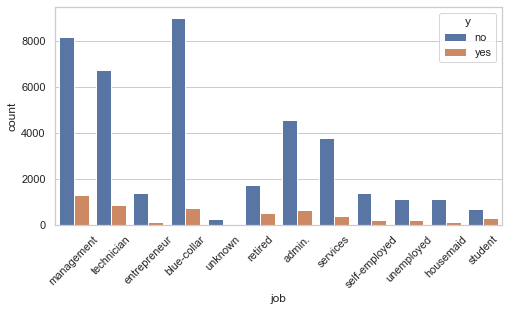

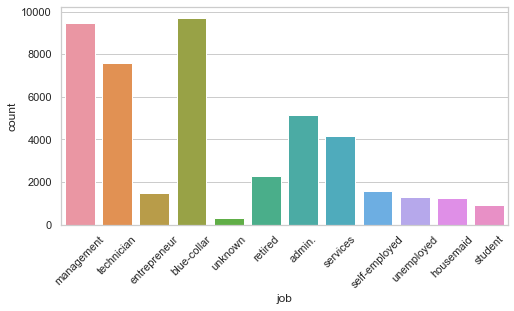

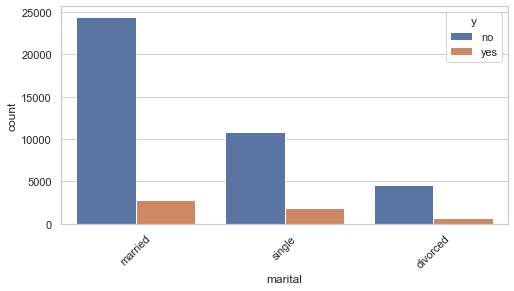

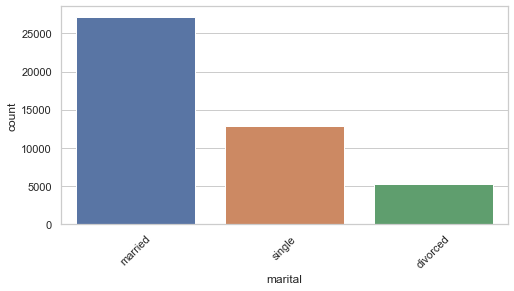

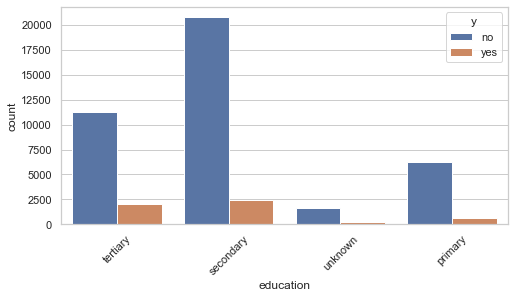

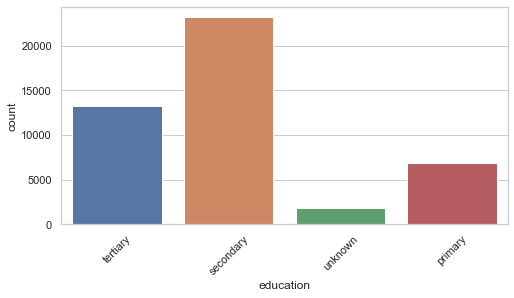

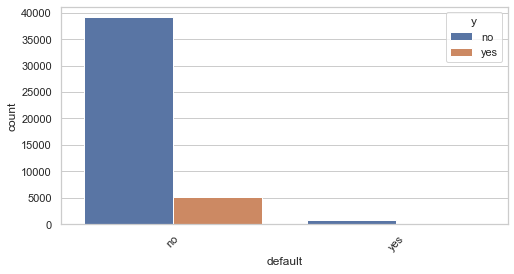

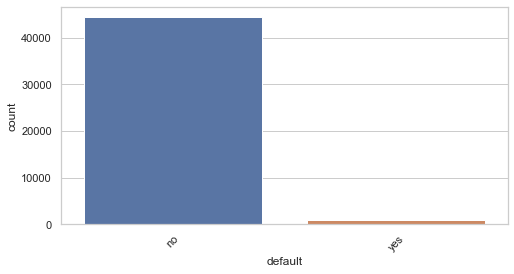

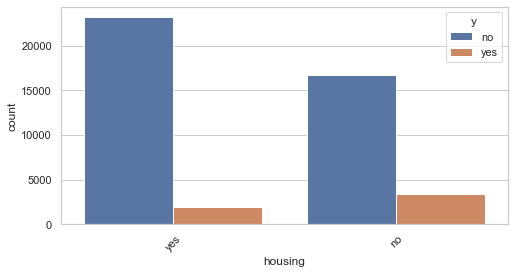

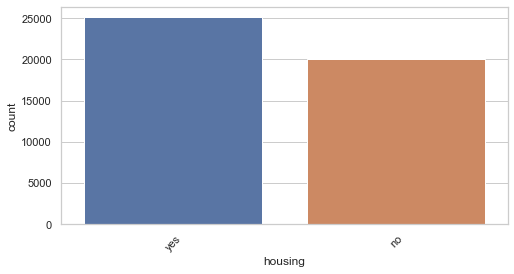

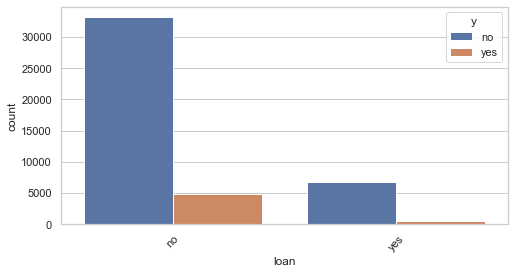

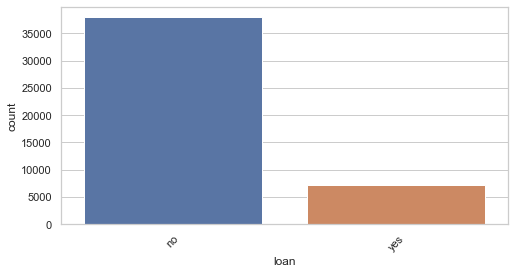

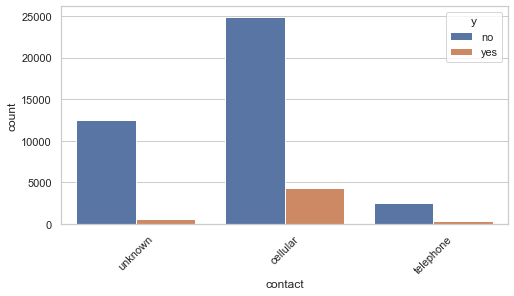

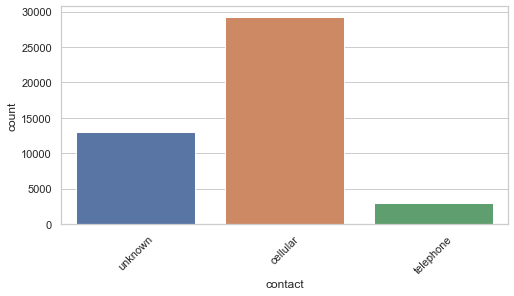

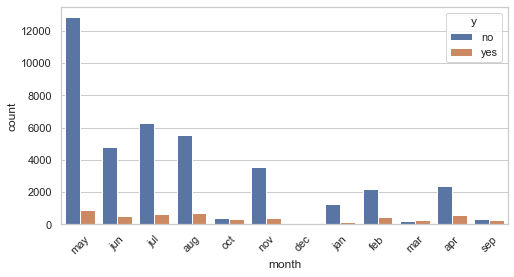

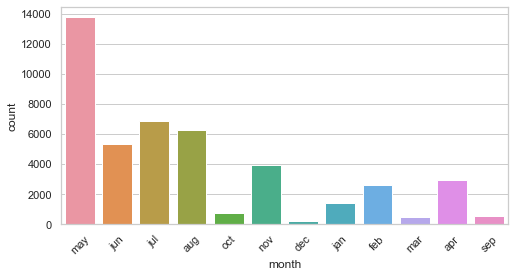

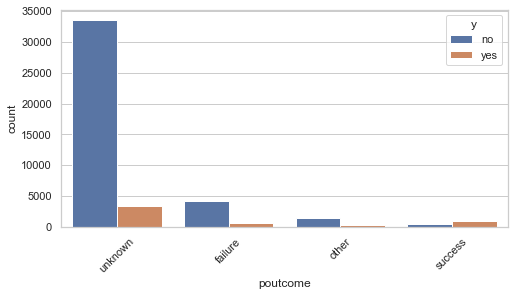

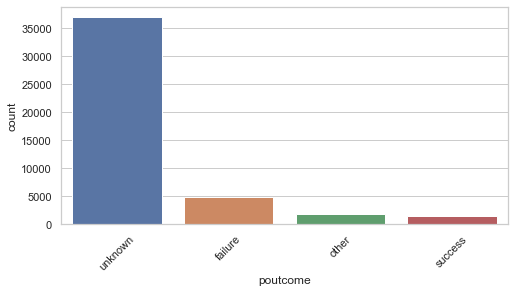

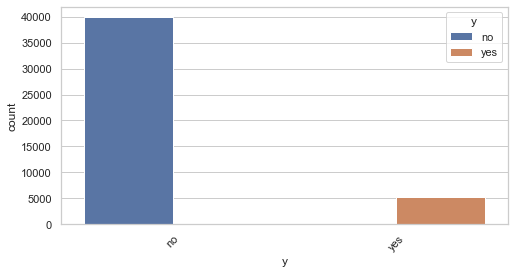

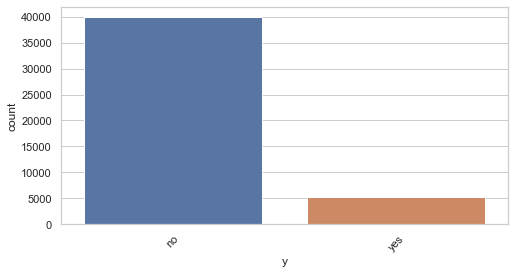

In [84]:
# data visualization for categorical columns

categorical = train.select_dtypes(include=['object']).columns.values

for col in categorical:
    plot_categorical_variable(train, col)

#Numerical Data  bar charts

In [85]:
def count_bin(col,x,y,z):
    # Define the ranges
    ranges = range(x,y,z)

    # Use pandas cut to group the ages into bins and value_counts to count the number of ages in each bin
    counts = pd.cut(train[col], ranges, right=False).value_counts().sort_index()

    # Rename the bins with the appropriate ranges
    counts.index = [f'{i.left+1}-{i.right}' for i in counts.index]

    # Print the age ranges and corresponding counts
    print(counts.to_string(index=False))

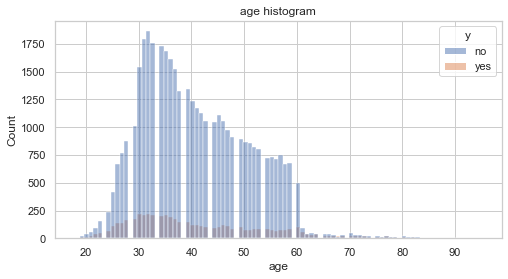

In [89]:
plt.figure(figsize=(8,4))
sns.set_theme(style="whitegrid")
sns.histplot(x=train['age'], data=train, hue='y', kde=False)
plt.title('age histogram')
plt.show()

In [ ]:
def get_age_group(age):
    if age < 10:
        return '0s'
    elif age < 20:
        return '10s'
    elif age < 30:
        return '20s'
    elif age < 40:
        return '30s'
    elif age < 50:
        return '40s'
    elif age < 60:
        return '50s'
    elif age < 70:
        return '60s'
    elif age < 80:
        return '70s'
    elif age < 90:
        return '80s'
    else:
        return '90+'

train['age_group'] = train['age'].apply(get_age_group)

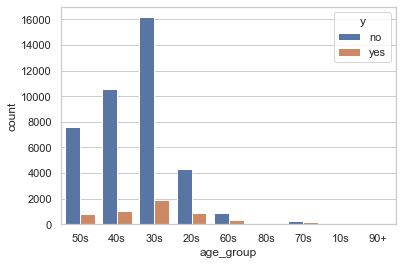

In [ ]:
sns.set_theme(style="whitegrid")
sns.countplot(x=train['age_group'], data=train, hue='y')
plt.show()

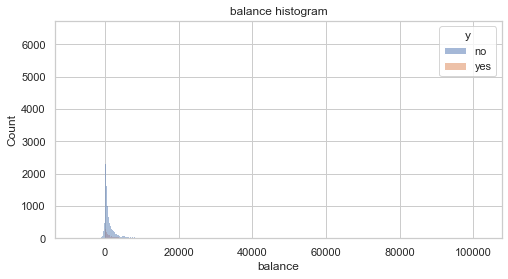

In [96]:
plt.figure(figsize=(8,4))
sns.set_theme(style="whitegrid")
sns.histplot(x=train['balance'], data=train, hue='y', kde=False)
plt.title('balance histogram')
plt.show()

In [ ]:
train['balance_group'] = ''
for index, row in train.iterrows():
    if row['balance'] < -10000:
        train.at[index, 'balance_group'] = '< -10000'
    elif row['balance'] < 0:
        train.at[index, 'balance_group'] = '-10000 to 0'
    elif row['balance'] < 10000:
        train.at[index, 'balance_group'] = '0 to 10000'
    elif row['balance'] < 20000:
        train.at[index, 'balance_group'] = '10000 to 20000'
    elif row['balance'] < 30000:
        train.at[index, 'balance_group'] = '20000 to 30000'
    elif row['balance'] < 40000:
        train.at[index, 'balance_group'] = '30000 to 40000'
    elif row['balance'] < 50000:
        train.at[index, 'balance_group'] = '40000 to 50000'
    elif row['balance'] < 60000:
        train.at[index, 'balance_group'] = '50000 to 60000'
    elif row['balance'] < 70000:
        train.at[index, 'balance_group'] = '60000 to 70000'
    elif row['balance'] < 80000:
        train.at[index, 'balance_group'] = '70000 to 80000'
    else:
        train.at[index, 'balance_group'] = '> 80000'

# Print the first few rows of the dataframe to verify the new column


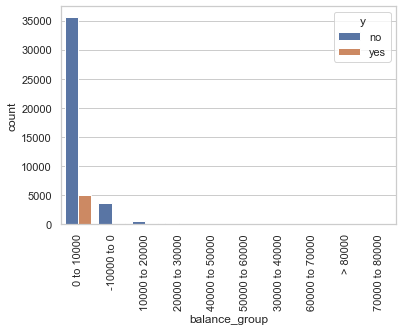

In [ ]:
sns.set_theme(style="whitegrid")
sns.countplot(x=train['balance_group'], data=train, hue='y')
plt.xticks(rotation=90)

plt.show()

<AxesSubplot: >

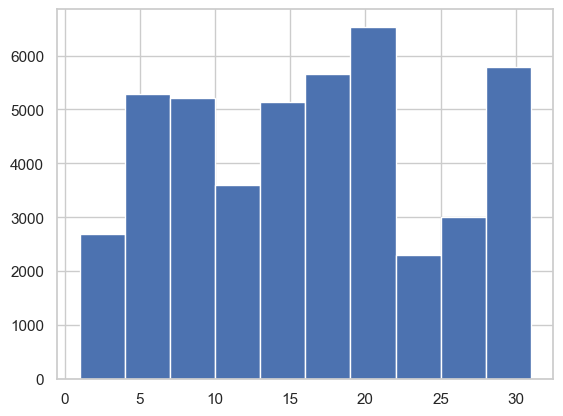

In [ ]:
train['day'].hist()

<AxesSubplot: >

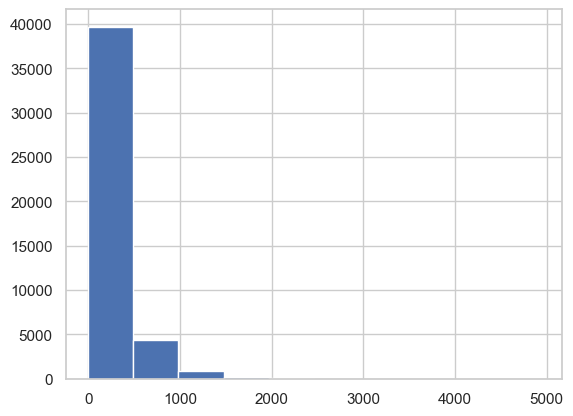

In [ ]:
train['duration'].hist()

<AxesSubplot: >

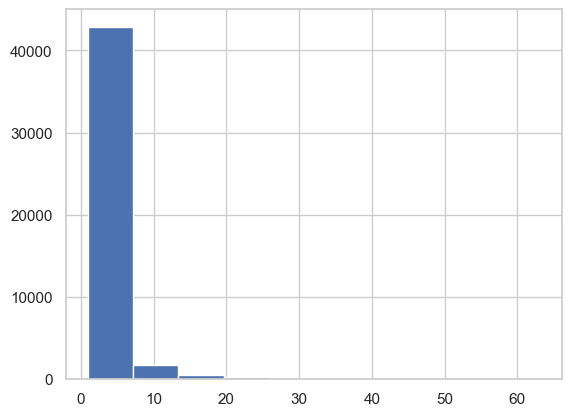

In [ ]:
train['campaign'].hist()

<AxesSubplot: >

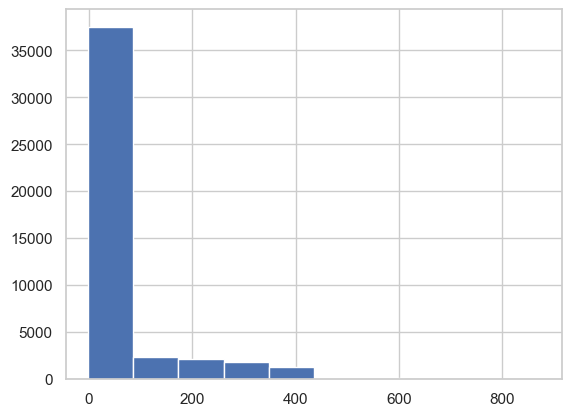

In [ ]:
train['pdays'].hist()

<AxesSubplot: >

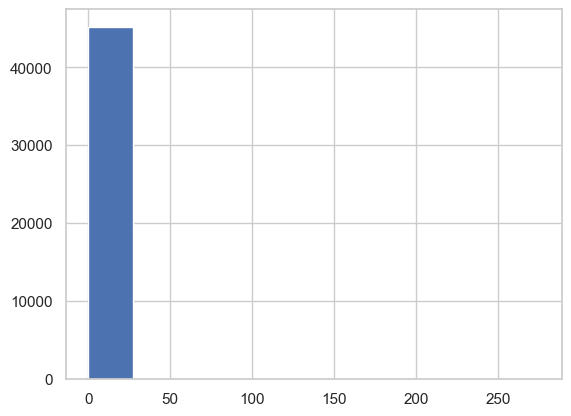

In [ ]:
train['previous'].hist()

C:\Users\user\AppData\Local\Temp\ipykernel_17024\1847423631.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = train.corr()


<AxesSubplot: >

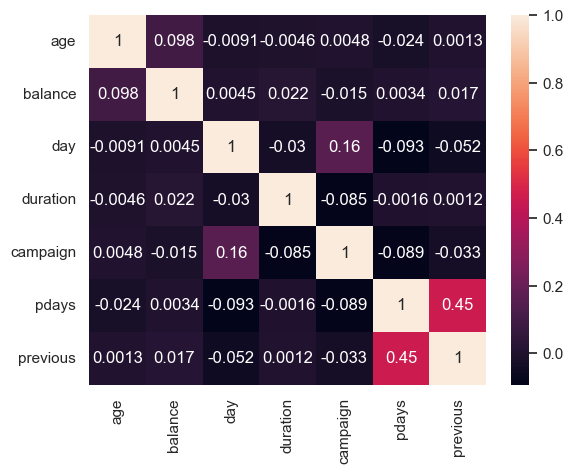

In [ ]:
correlation_matrix = train.corr()
sns.heatmap(correlation_matrix, annot =True)

In [ ]:
# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_17024\102845399.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  df = df.dropna('columns')


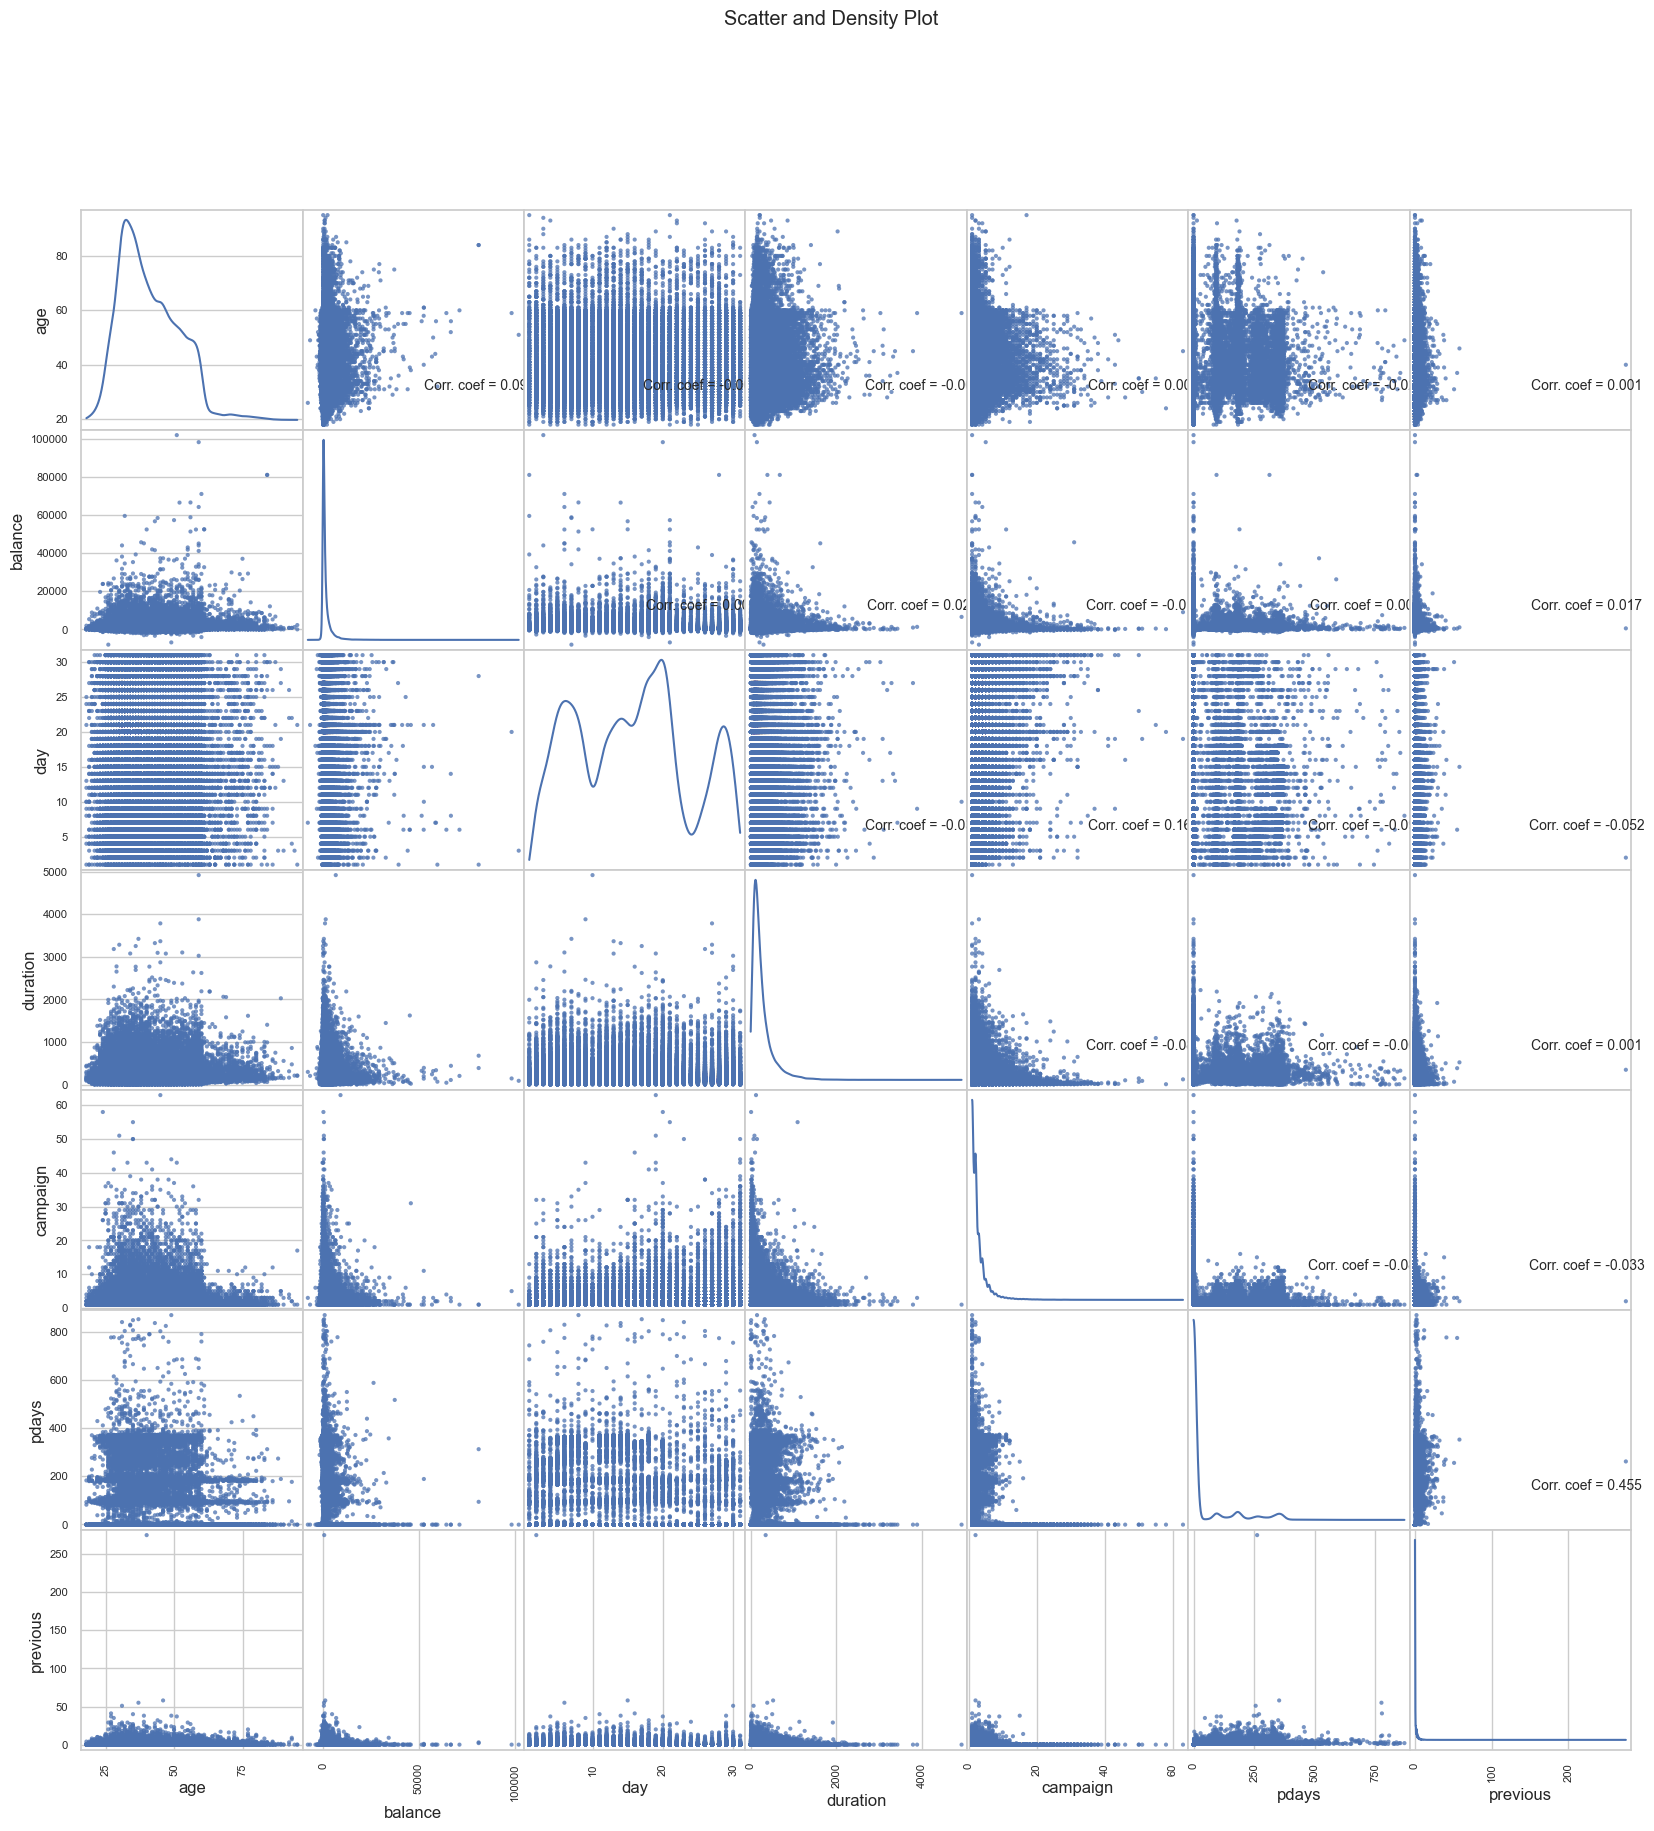

In [ ]:
plotScatterMatrix(train, 20, 10)

There is no multicollinearity between independent variables

# Preprocessing

### Drop Columns
Because there is no year information that some months have more data than the others so it is going to make the data bias. We are going to drop `month` and `day`

In [ ]:
train.drop(['day', 'month'], axis=1, inplace=True)
test.drop(['day', 'month'], axis=1, inplace=True)

**Changing Data Type**

We are going to change four categorical columns into numerical columns because they have binary values. (`default`, `housing`, `loan`, `y`)

In [ ]:
for col in ['default', 'housing', 'loan', 'y']:
    train[col].replace(['yes', 'no'], [1, 0], inplace=True)
    test[col].replace(['yes', 'no'], [1, 0], inplace=True)

In [ ]:
train

,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,0,2143,1,0,unknown,261,1,-1,0,unknown,0
1,44,technician,single,secondary,0,29,1,0,unknown,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,0,2,1,1,unknown,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,0,1506,1,0,unknown,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,0,1,0,0,unknown,198,1,-1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,0,825,0,0,cellular,977,3,-1,0,unknown,1
45207,71,retired,divorced,primary,0,1729,0,0,cellular,456,2,-1,0,unknown,1
45208,72,retired,married,secondary,0,5715,0,0,cellular,1127,5,184,3,success,1
45209,57,blue-collar,married,secondary,0,668,0,0,telephone,508,4,-1,0,unknown,0


In [ ]:
test

,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,0,1787,0,0,cellular,79,1,-1,0,unknown,0
1,33,services,married,secondary,0,4789,1,1,cellular,220,1,339,4,failure,0
2,35,management,single,tertiary,0,1350,1,0,cellular,185,1,330,1,failure,0
3,30,management,married,tertiary,0,1476,1,1,unknown,199,4,-1,0,unknown,0
4,59,blue-collar,married,secondary,0,0,1,0,unknown,226,1,-1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,0,-333,1,0,cellular,329,5,-1,0,unknown,0
4517,57,self-employed,married,tertiary,1,-3313,1,1,unknown,153,1,-1,0,unknown,0
4518,57,technician,married,secondary,0,295,0,0,cellular,151,11,-1,0,unknown,0
4519,28,blue-collar,married,secondary,0,1137,0,0,cellular,129,4,211,3,other,0


**Seperate Columns**

We are going to separate the categorical and numerical columns because they will be treated differently.

Feature Selection 1: Numerical Input to Categorical Output

Method : Correlation Test and ANOVA

In [ ]:
cat_cols = ['job', 'marital', 'education', 'poutcome']
num_cols = ['age', 'default', 'balance', 'housing', 'loan', 'duration', 'campaign', 'pdays', 'previous']
tar_cols = ['y']

In [ ]:
df_cat = train[cat_cols + tar_cols]
df_num = train[num_cols + tar_cols]

In [ ]:
print('Categorical Data: ', df_cat.shape)
print('Numerical Data: ', df_num.shape)

Categorical Data:  (45211, 5)
Numerical Data:  (45211, 10)


In [ ]:
df_num

,age,default,balance,housing,loan,duration,campaign,pdays,previous,y
0,58,0,2143,1,0,261,1,-1,0,0
1,44,0,29,1,0,151,1,-1,0,0
2,33,0,2,1,1,76,1,-1,0,0
3,47,0,1506,1,0,92,1,-1,0,0
4,33,0,1,0,0,198,1,-1,0,0
...,...,...,...,...,...,...,...,...,...,...
45206,51,0,825,0,0,977,3,-1,0,1
45207,71,0,1729,0,0,456,2,-1,0,1
45208,72,0,5715,0,0,1127,5,184,3,1
45209,57,0,668,0,0,508,4,-1,0,0


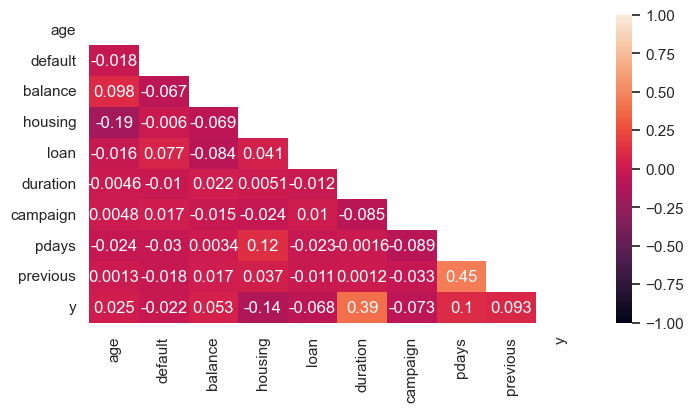

In [ ]:
# Correlation Test

plt.figure(figsize=(8,4))
mask = np.triu(np.ones_like(df_num.corr(), dtype=bool))
sns.heatmap(df_num.corr(), vmin=-1, vmax=1, mask=mask, annot=True)
plt.show()

There is no multicollinearity between independent variables

If have multicollinearity problem, we need to eliminate one or more of the highly correlated independent variables from the model. 
Another option is to use a dimensionality reduction technique, such as principal component analysis, to combine the highly correlated variables into a single composite variable that captures the underlying structure of the data.

In [ ]:
df_num[['age', 'balance', 'duration', 'campaign', 'previous']].skew()

age          0.684818
balance      8.360308
duration     3.144318
campaign     4.898650
previous    41.846454
dtype: float64

In [ ]:
df_num[['age', 'balance', 'duration', 'campaign', 'previous']].kurtosis()

age            0.319570
balance      140.751547
duration      18.153915
campaign      39.249651
previous    4506.860660
dtype: float64

In [ ]:
def plot_histogram(data, name, bins=30, kde=False, figsize=(8,4)):
    plt.figure(figsize=figsize)
    sns.set_theme(style="whitegrid")
    sns.histplot(x=data[name], data=data, hue='y', kde=kde)
    # plt.title(name)
    plt.show()

    plt.figure(figsize=figsize)
    sns.set_theme(style="whitegrid")
    sns.histplot(x=data[name], data=data, kde=kde)
    # plt.title(name)
    plt.show()


    plt.figure(figsize=figsize)
    sns.set_theme(style="whitegrid")
    sns.kdeplot(x=data[name], data=data, cumulative=True)
    # plt.title(name)
    plt.show()

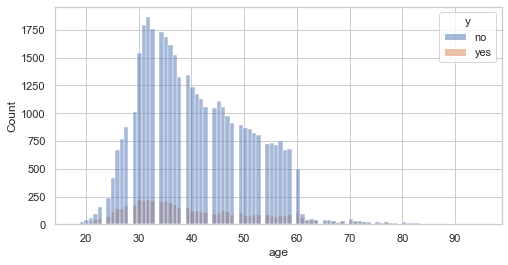

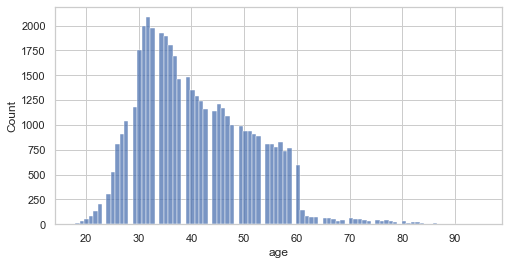

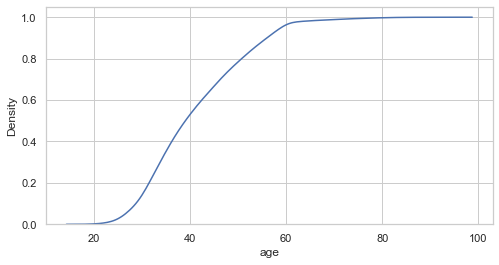

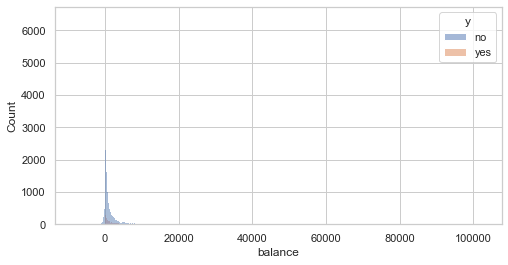

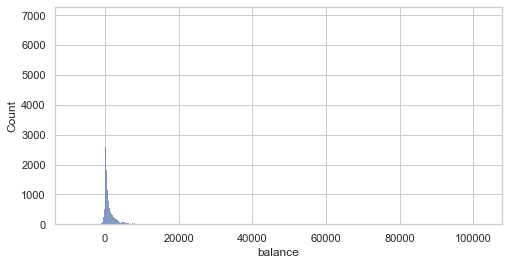

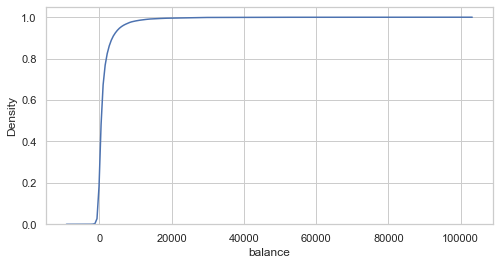

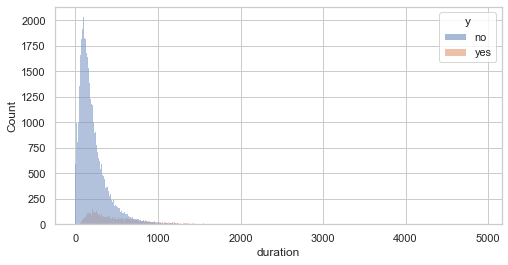

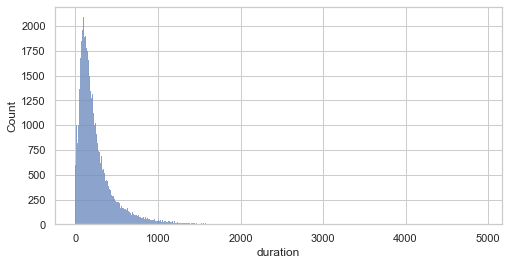

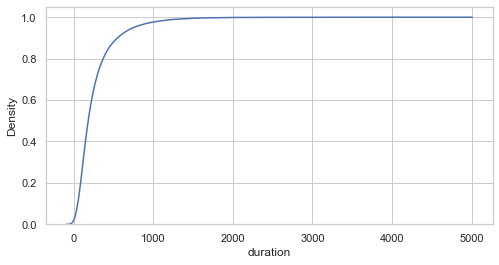

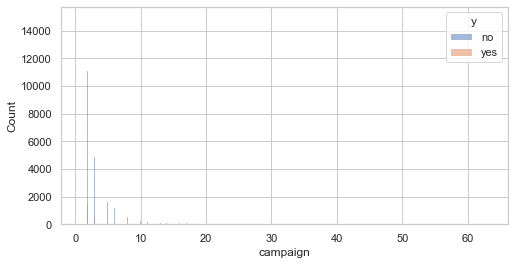

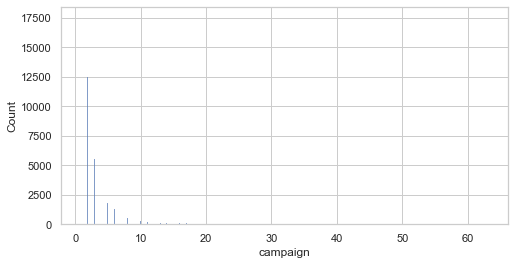

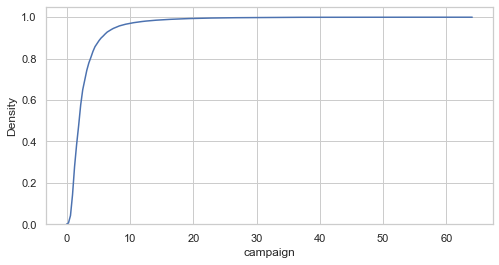

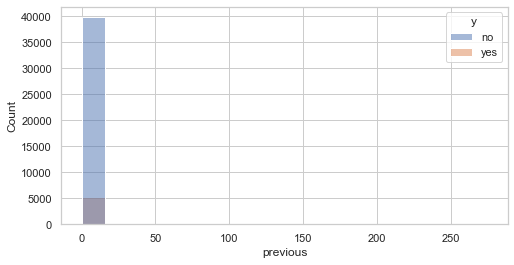

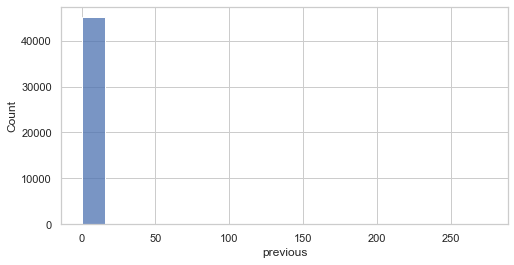

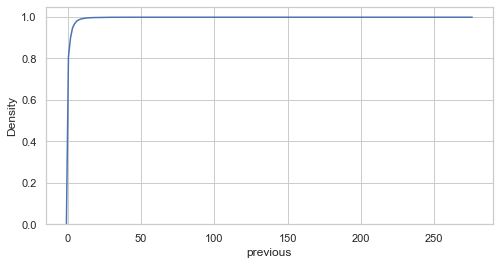

In [ ]:
for col in ['age', 'balance', 'duration', 'campaign', 'previous']:
    plot_histogram(train, col)

In [ ]:
x = df_num[df_num.columns[:-1]]
y = df_num[df_num.columns[-1]]

x = MinMaxScaler().fit_transform(x)

In [ ]:
# ANOVA

f_score, p_value = f_classif(x, y)

In [ ]:
for i in range(len(df_num.columns[:-1])):
    print(df_num.columns[:-1][i], ': ', p_value[i])

age :  8.825643691736339e-08
default :  1.866326526158345e-06
balance :  2.521113691910737e-29
housing :  2.6219265718453086e-194
loan :  9.793657535311501e-48
duration :  0.0
campaign :  1.0123473643070218e-54
pdays :  3.7905533194863624e-108
previous :  7.801830349573926e-88


Conclusion:

All numerical features are significant variables because the P-Value < 0.05.

Feature Selection 2: Categorical Input to Categorical Output

Method: Chi-squared Test

In [ ]:
le = LabelEncoder()

In [ ]:
x = df_cat[df_cat.columns[:-1]]
y = df_cat[df_cat.columns[-1]]

for col in df_cat.columns[:-1]:
    x[col] = le.fit_transform(x[col])

C:\Users\user\AppData\Local\Temp\ipykernel_17024\101313240.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x[col] = le.fit_transform(x[col])


In [ ]:
x = MinMaxScaler().fit_transform(x)

In [ ]:
chi_score, pvalue = chi2(x, y)

In [ ]:
for i in range(len(df_cat.columns[:-1])):
    print(df_cat.columns[:-1][i], ': ', pvalue[i])

job :  4.6479013187493395e-05
marital :  0.00011438719484978733
education :  3.8852423710552006e-08
poutcome :  3.4842164799113658e-09


Conclusion:

All categorical features are significant variables because the P-Value < 0.05.

In [ ]:
train

,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,0,2143,1,0,unknown,261,1,-1,0,unknown,0
1,44,technician,single,secondary,0,29,1,0,unknown,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,0,2,1,1,unknown,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,0,1506,1,0,unknown,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,0,1,0,0,unknown,198,1,-1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,0,825,0,0,cellular,977,3,-1,0,unknown,1
45207,71,retired,divorced,primary,0,1729,0,0,cellular,456,2,-1,0,unknown,1
45208,72,retired,married,secondary,0,5715,0,0,cellular,1127,5,184,3,success,1
45209,57,blue-collar,married,secondary,0,668,0,0,telephone,508,4,-1,0,unknown,0


We need to transform the categorical features. There are two ways of doing this which are Label Encoding and One Hot Encoding.

- job : We will use Label Encoding because there are a lot of categories.
- education : We will use Label Encoding because it is an ordinal categorical feature.
- marital : We will use One Hot Encoding.
- poutcome : We will use One Hot Encoding.
- contact: We will use One Hot Encoding.

In [ ]:
def save_encoder(encoder, destination):
    folder_name = "/".join(destination.split('/')[:-1])
    if not os.path.exists(folder_name):
        os.makedirs(folder_name)
    np.save(destination, encoder.classes_)

In [ ]:
# Label Encoding
le = LabelEncoder()
train['job'] = le.fit_transform(train['job'])
test['job'] = le.transform(test['job'])

In [ ]:
# One hot encoding
train = pd.get_dummies(train, columns=['marital', 'poutcome', 'contact'])
test = pd.get_dummies(test, columns=['marital', 'poutcome', 'contact'])

In [ ]:
# Ordinal Encoding
train['education'].replace(['primary', 'secondary', 'tertiary', 'unknown'], [1, 2, 3, 0], inplace=True)
test['education'].replace(['primary', 'secondary', 'tertiary', 'unknown'], [1, 2, 3, 0], inplace=True)

In [ ]:
# Standardize numerical data

scaler = StandardScaler()

cols = ['age', 'job', 'education', 'default', 'balance', 'housing', 'loan', 'duration', 'campaign', 'pdays', 'previous']

X_train = pd.DataFrame(scaler.fit_transform(train[cols]))
X_test = pd.DataFrame(scaler.transform(test[cols]))

Y_train = train['y']
Y_test = test['y']


X_train.columns = cols
X_test.columns = cols

In [ ]:
X_train = pd.concat([X_train, train.iloc[:, len(cols)+1:]], axis=1)
X_test = pd.concat([X_test, test.iloc[:, len(cols)+1:]], axis=1)

In [ ]:
train = pd.concat([X_train, Y_train], axis=1)

In [ ]:
test = pd.concat([X_test, Y_test], axis=1)

In [ ]:
train

,age,job,education,default,balance,housing,loan,duration,campaign,pdays,...,marital_married,marital_single,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,contact_cellular,contact_telephone,contact_unknown,y
0,1.606965,-0.103820,1.206484,-0.13549,0.256419,0.893915,-0.436803,0.011016,-0.569351,-0.411453,...,1,0,0,0,0,1,0,0,1,0
1,0.288529,1.424008,-0.077715,-0.13549,-0.437895,0.893915,-0.436803,-0.416127,-0.569351,-0.411453,...,0,1,0,0,0,1,0,0,1,0
2,-0.747384,-0.714951,-0.077715,-0.13549,-0.446762,0.893915,2.289359,-0.707361,-0.569351,-0.411453,...,1,0,0,0,0,1,0,0,1,0
3,0.571051,-1.020516,-2.646114,-0.13549,0.047205,0.893915,-0.436803,-0.645231,-0.569351,-0.411453,...,1,0,0,0,0,1,0,0,1,0
4,-0.747384,2.035139,-2.646114,-0.13549,-0.447091,-1.118674,-0.436803,-0.233620,-0.569351,-0.411453,...,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,0.947747,1.424008,1.206484,-0.13549,-0.176460,-1.118674,-0.436803,2.791329,0.076230,-0.411453,...,1,0,0,0,0,1,1,0,0,1
45207,2.831227,0.201746,-1.361914,-0.13549,0.120447,-1.118674,-0.436803,0.768224,-0.246560,-0.411453,...,0,0,0,0,0,1,1,0,0,1
45208,2.925401,0.201746,-0.077715,-0.13549,1.429593,-1.118674,-0.436803,3.373797,0.721811,1.436189,...,1,0,0,0,1,0,1,0,0,1
45209,1.512791,-1.020516,-0.077715,-0.13549,-0.228024,-1.118674,-0.436803,0.970146,0.399020,-0.411453,...,1,0,0,0,0,1,0,1,0,0


In [ ]:
X_train, Y_train = train.iloc[:, :-1], train.iloc[:, -1]
X_test, Y_test = test.iloc[:, :-1], test.iloc[:, -1]

# Model Selection

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
import catboost

In [ ]:
acc_list = []
auc_list = []
cm_list = []
models = []

models.append(LogisticRegression(solver='liblinear'))
models.append(SVC())
models.append(KNeighborsClassifier())
models.append(DecisionTreeClassifier())
models.append(RandomForestClassifier())
models.append(GaussianNB())

model_list = ['Logistic Regression', 'SVM', 'KNN', 'Decision Tree', 'Random Forest', 'Naive Bayes']

for model in models:
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    acc_list.append(metrics.accuracy_score(Y_test, Y_pred))
    fpr, tpr, _thresholds = metrics.roc_curve(Y_test, Y_pred)
    auc_list.append(round(metrics.auc(fpr, tpr),2))
    cm_list.append(confusion_matrix(Y_test, Y_pred))


In [ ]:
# catboost
model_cb = catboost.CatBoostClassifier(task_type='GPU', iterations=200)
model_cb.fit(X_train, Y_train)


Learning rate set to 0.115615
0:	learn: 0.5584105	total: 8.52ms	remaining: 1.7s
1:	learn: 0.4651768	total: 16.4ms	remaining: 1.62s
2:	learn: 0.3931355	total: 22.7ms	remaining: 1.49s
3:	learn: 0.3523188	total: 30.1ms	remaining: 1.48s
4:	learn: 0.3206373	total: 37.8ms	remaining: 1.47s
5:	learn: 0.3015946	total: 47.2ms	remaining: 1.52s
6:	learn: 0.2839087	total: 54ms	remaining: 1.49s
7:	learn: 0.2737219	total: 61ms	remaining: 1.46s
8:	learn: 0.2653904	total: 68.6ms	remaining: 1.46s
9:	learn: 0.2591052	total: 78.3ms	remaining: 1.49s
10:	learn: 0.2536891	total: 85.4ms	remaining: 1.47s
11:	learn: 0.2483335	total: 94.6ms	remaining: 1.48s
12:	learn: 0.2444823	total: 102ms	remaining: 1.46s
13:	learn: 0.2418212	total: 111ms	remaining: 1.47s
14:	learn: 0.2392138	total: 118ms	remaining: 1.45s
15:	learn: 0.2370799	total: 125ms	remaining: 1.44s
16:	learn: 0.2355308	total: 134ms	remaining: 1.44s
17:	learn: 0.2344241	total: 141ms	remaining: 1.43s
18:	learn: 0.2332926	total: 149ms	remaining: 1.42s
19:	

In [ ]:
Y_catboost = model_cb.predict(X_test)
acc_list.append(metrics.accuracy_score(Y_test, Y_catboost))
auc_list.append("error")
cm_list.append(confusion_matrix(Y_test, Y_catboost))

In [ ]:
model_list.append('Catboost')

# Evaluating

In [ ]:
# Accuracy and AUC
result_df = pd.DataFrame({'Model':model_list, 'Accuracy': acc_list, 'AUC': auc_list})
result_df

,Model,Accuracy,AUC
0,Logistic Regression,0.901349,0.64
1,SVM,0.907985,0.65
2,KNN,0.917054,0.71
3,Decision Tree,1.000000,1.0
4,Random Forest,0.999779,1.0
5,Naive Bayes,0.833002,0.68
6,Catboost,0.922583,error


In [ ]:
from sklearn import tree

Print out the decision tree to see how it is structured

In [ ]:
# Fit the classifier with default hyper-parameters
clf = DecisionTreeClassifier()
model = clf.fit(X_train, Y_train)

text_representation = tree.export_text(clf)
print(text_representation)

# fig = plt.figure(figsize=(25,20))
# _ = tree.plot_tree(clf)

|--- feature_7 <= 1.02
|   |--- feature_16 <= 0.50
|   |   |--- feature_7 <= -0.20
|   |   |   |--- feature_0 <= 1.84
|   |   |   |   |--- feature_7 <= -0.50
|   |   |   |   |   |--- feature_7 <= -0.70
|   |   |   |   |   |   |--- feature_7 <= -0.77
|   |   |   |   |   |   |   |--- feature_0 <= -1.08
|   |   |   |   |   |   |   |   |--- feature_4 <= 2.75
|   |   |   |   |   |   |   |   |   |--- feature_9 <= 3.16
|   |   |   |   |   |   |   |   |   |   |--- feature_1 <= 1.27
|   |   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |   |   |--- feature_1 >  1.27
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 6
|   |   |   |   |   |   |   |   |   |--- feature_9 >  3.16
|   |   |   |   |   |   |   |   |   |   |--- feature_9 <= 3.17
|   |   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |   |   |--- feature_9 >  3.17
|   |   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   | 

#Note

As you can see, the decision tree is extremely complicated, and the overfitting could be caused by the tree capturing noise or irrelevant features in the training data.

We then reduce the depth of the tree to just 4 and try again to get a more reasonable accuracy.

In [ ]:
# find a usable but reasonable depth for the tree (try from 1-30)

TreeAccuracyList = []
TreeAucList = []
ForestAccuracyList = []
ForestAucList = []

In [ ]:
for max_depth in range(1,26):
    new_model = DecisionTreeClassifier(max_depth = max_depth).fit(X_train, Y_train)
    Y_pred = new_model.predict(X_test)
    acc = round(metrics.accuracy_score(Y_test, Y_pred),4)
    fpr, tpr, _thresholds = metrics.roc_curve(Y_test, Y_pred)
    auc = round(metrics.auc(fpr, tpr),2)
    TreeAccuracyList.append(acc)
    TreeAucList.append(auc)

decision_tree_table = pd.DataFrame({ 'Accuracy': TreeAccuracyList, 'AUC':TreeAucList})

In [ ]:
display(decision_tree_table)

,Accuracy,AUC
0,0.8848,0.50
1,0.8969,0.65
2,0.9000,0.65
3,0.9016,0.64
4,0.9031,0.65
5,0.9033,0.69
6,0.9120,0.69
7,0.9129,0.70
8,0.9171,0.71
9,0.9224,0.72


In [ ]:
for max_depth in range(1,11):
    new_model = RandomForestClassifier(max_depth = max_depth).fit(X_train, Y_train)
    Y_pred = new_model.predict(X_test)
    acc = round(metrics.accuracy_score(Y_test, Y_pred),4)
    fpr, tpr, _thresholds = metrics.roc_curve(Y_test, Y_pred)
    auc = round(metrics.auc(fpr, tpr),2)
    ForestAccuracyList.append(acc)
    ForestAucList.append(auc)

random_forest_table = pd.DataFrame({ 'Accuracy': ForestAccuracyList, 'AUC':ForestAucList})

In [ ]:
display(random_forest_table)

,Accuracy,AUC
0,0.8848,0.50
1,0.8848,0.50
2,0.8863,0.51
3,0.8943,0.56
4,0.8958,0.57
5,0.8965,0.57
6,0.8974,0.58
7,0.9047,0.61
8,0.9129,0.65
9,0.9208,0.68


the models are quite good with accuracy > 90% since depth = 4 for Tree, and depth = 8 for Forest
[the picture of the decision tree of this level is shown below]

Accuracy: 0.9
AUC: 0.64


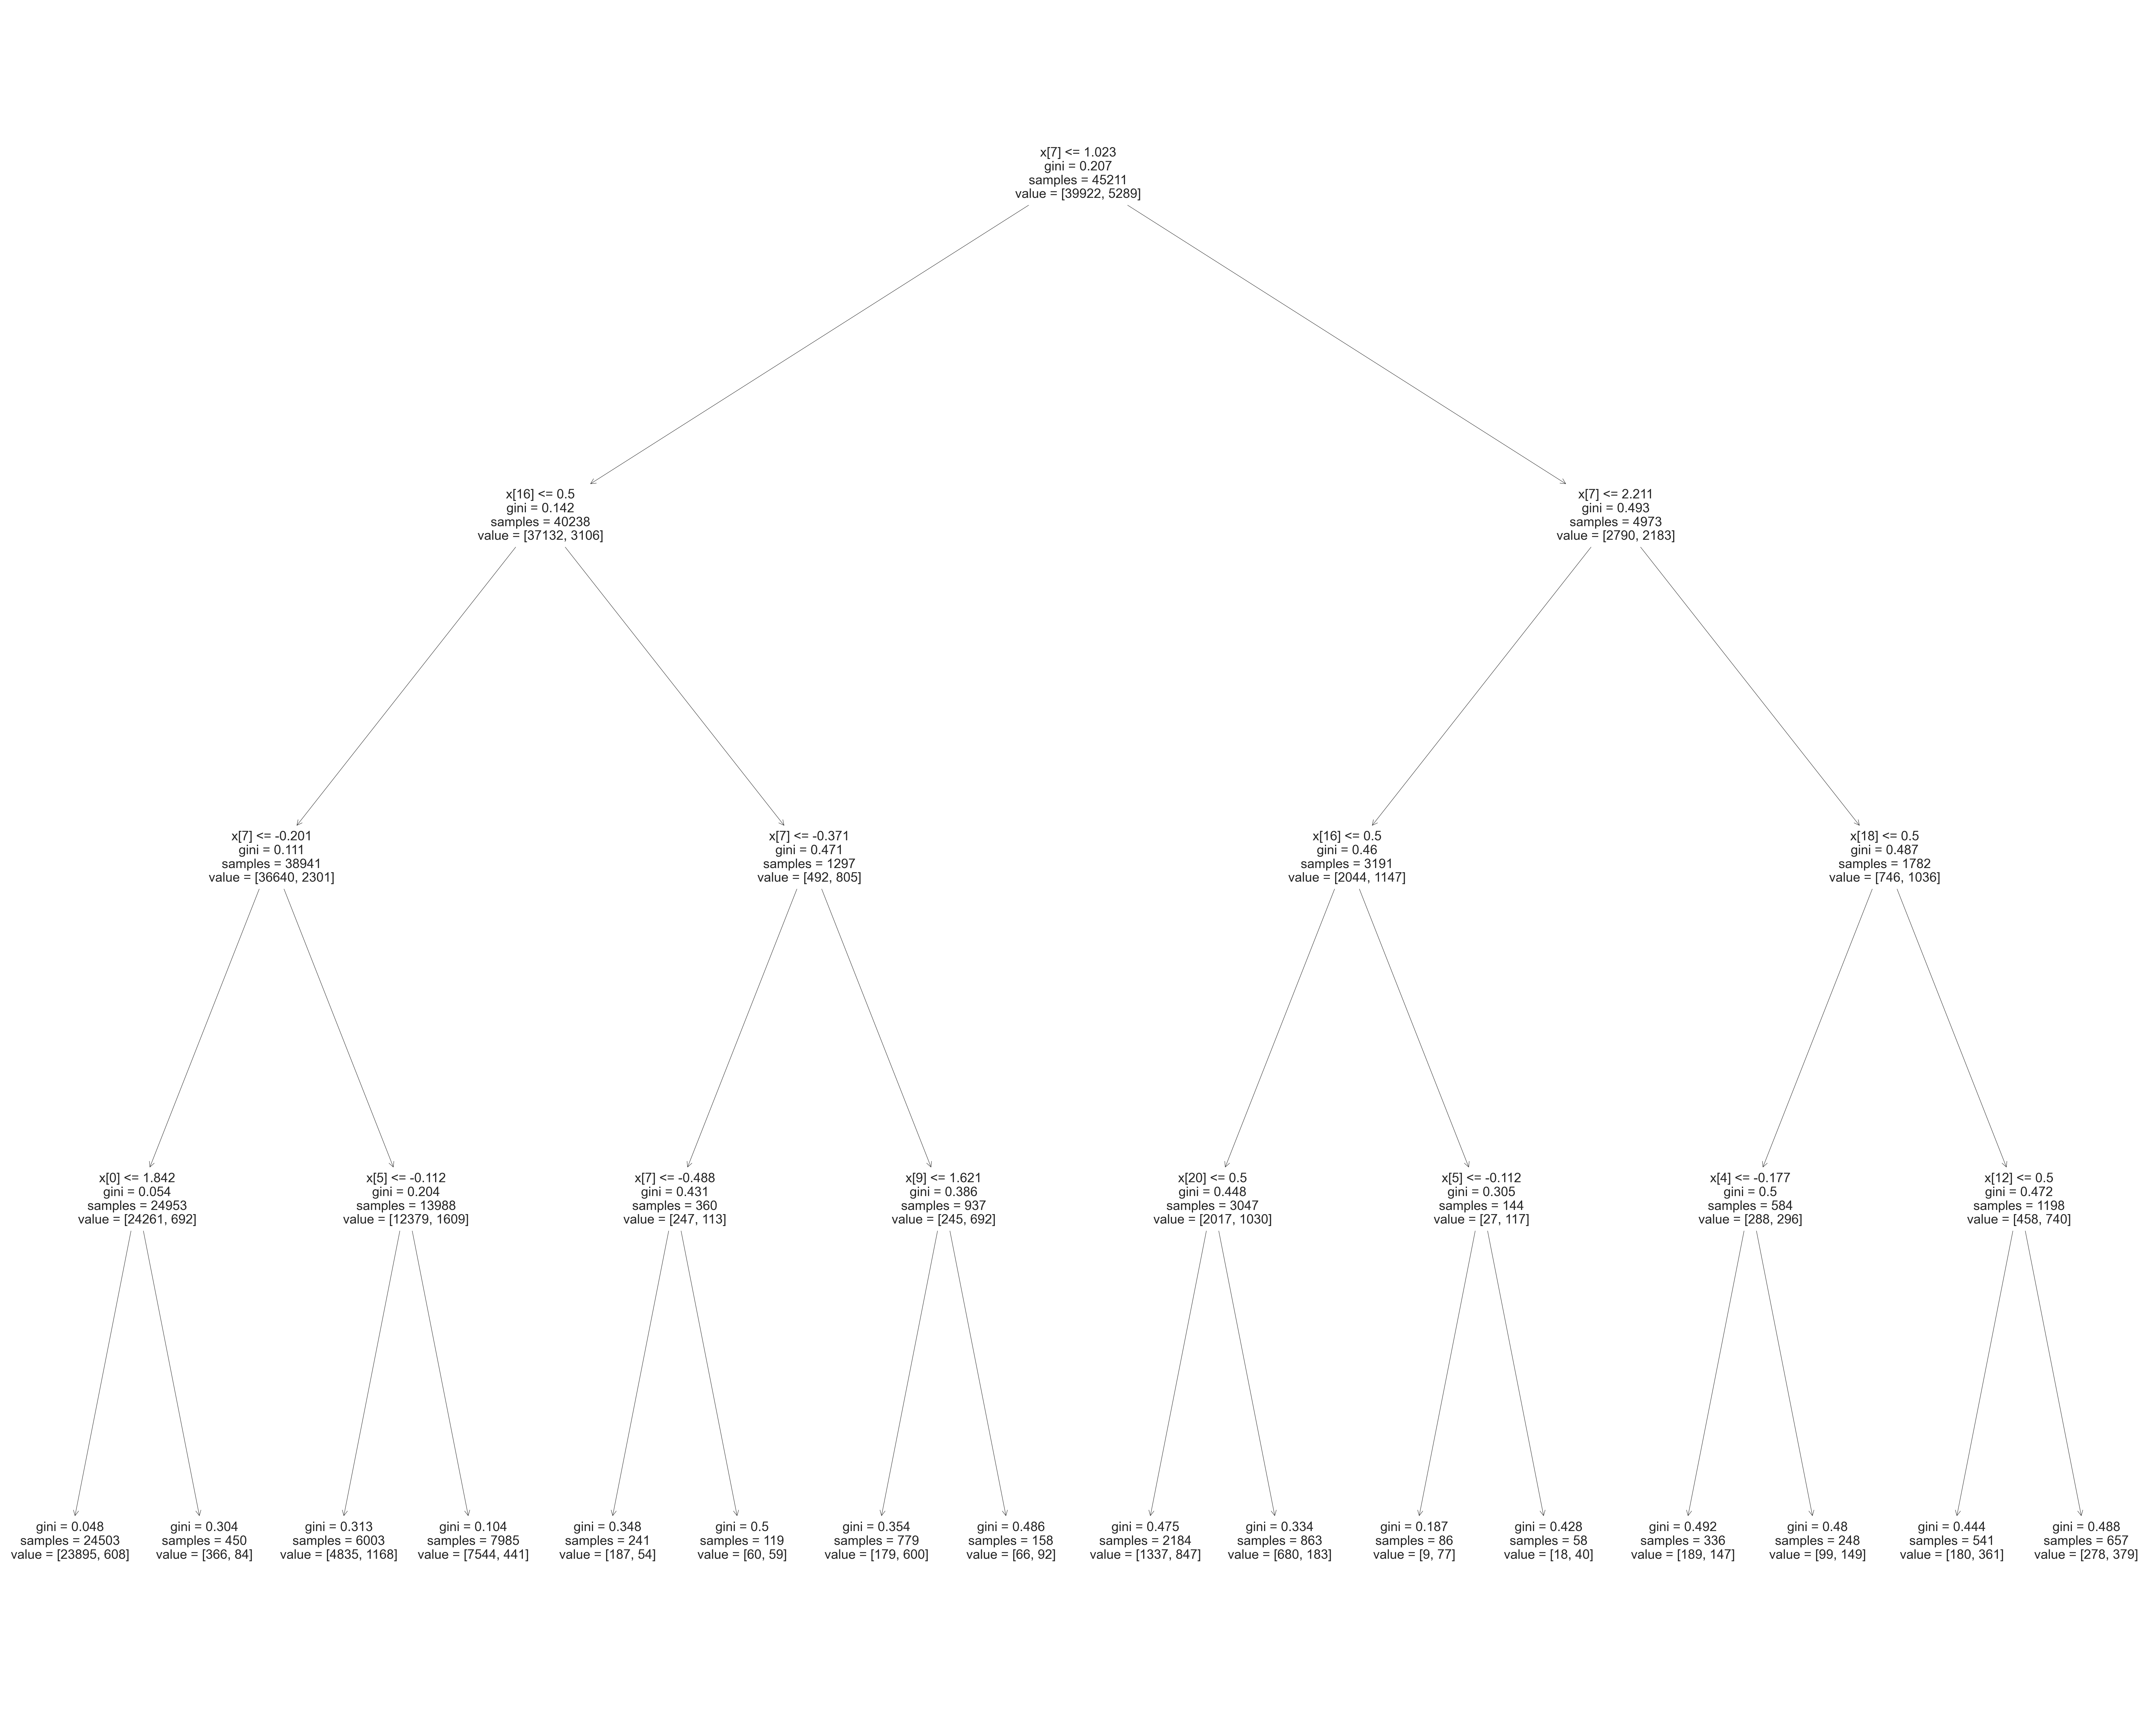

In [ ]:
new_model = DecisionTreeClassifier(max_depth = 4).fit(X_train, Y_train)
Y_pred = new_model.predict(X_test)
acc = round(metrics.accuracy_score(Y_test, Y_pred),2)
fpr, tpr, _thresholds = metrics.roc_curve(Y_test, Y_pred)
auc = round(metrics.auc(fpr, tpr),2)
print(f"Accuracy: {acc}")
print(f"AUC: {auc}")

fig = plt.figure(figsize=(100,80))
_ = tree.plot_tree(new_model)

For the old models,

In [ ]:
# change the cm to avoid overfitting
models = list()
acc_list = list()
auc_list = list()
cm_list = list()

model_list = ['Logistic Regression', 'SVM', 'KNN', 'Decision Tree', 'Random Forest', 'Naive Bayes', 'Catboost']

models.append(LogisticRegression(solver='liblinear'))
models.append(SVC())
models.append(KNeighborsClassifier())
models.append(DecisionTreeClassifier(max_depth = 4))
models.append(RandomForestClassifier(max_depth = 8))
models.append(GaussianNB())

for model in models:
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    acc_list.append(metrics.accuracy_score(Y_test, Y_pred))
    fpr, tpr, _thresholds = metrics.roc_curve(Y_test, Y_pred)
    auc_list.append(round(metrics.auc(fpr, tpr),2))
    cm_list.append(confusion_matrix(Y_test, Y_pred))


In [ ]:
acc_list.append(metrics.accuracy_score(Y_test, Y_catboost))
auc_list.append("error")
cm_list.append(confusion_matrix(Y_test, Y_catboost))
model_list.append('Catboost')

In [ ]:
# print(model_list, acc_list, auc_list)

accuracy_table = pd.DataFrame({'Models':model_list, 'Accuracy':acc_list, 'AUC':auc_list})
display(accuracy_table)

,Models,Accuracy,AUC
0,Logistic Regression,0.901349,0.64
1,SVM,0.907985,0.65
2,KNN,0.917054,0.71
3,Decision Tree,0.901570,0.64
4,Random Forest,0.901349,0.6
5,Naive Bayes,0.833002,0.68
6,Catboost,0.922583,error


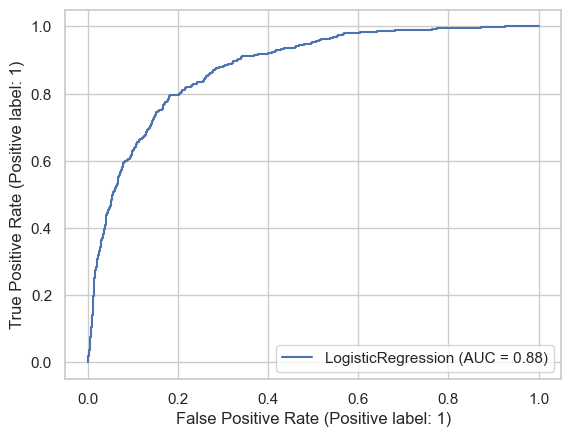

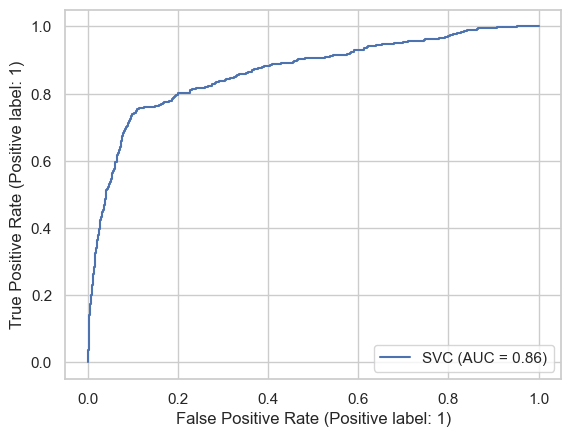

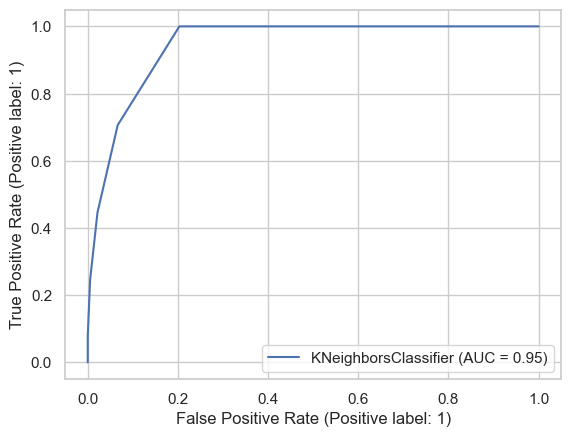

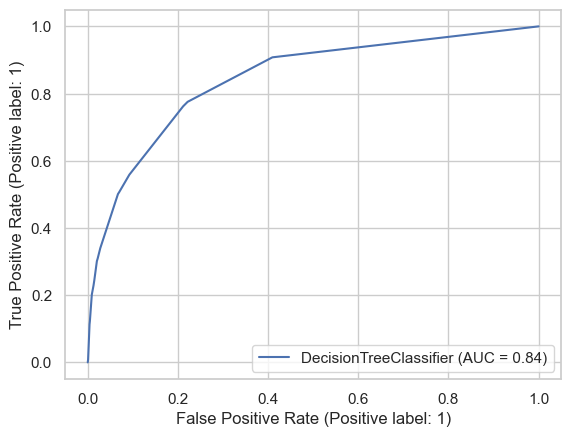

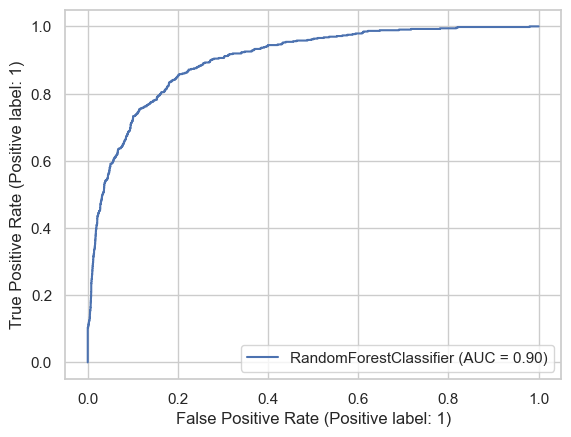

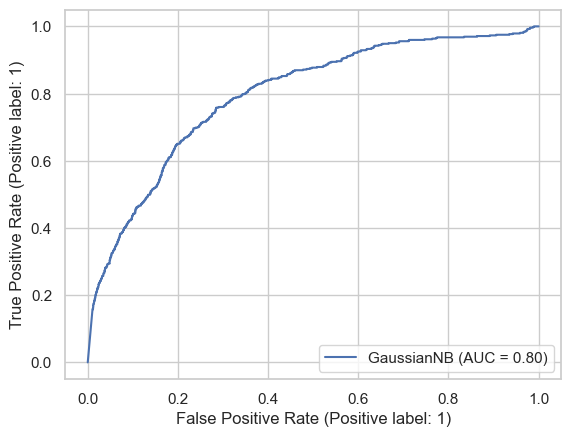

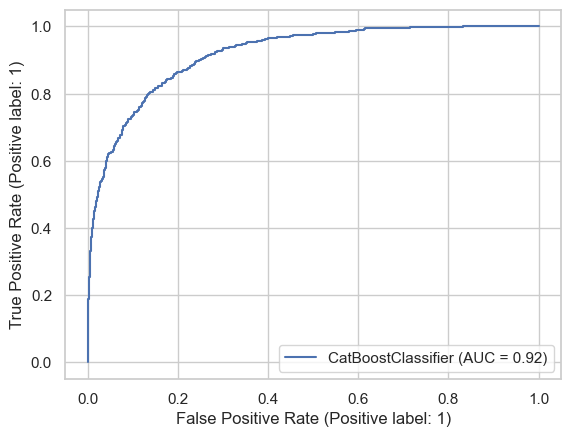

In [ ]:
# Plot ROC Curve
from sklearn.metrics import roc_curve, auc, RocCurveDisplay

for model in models:
    RocCurveDisplay.from_estimator(model, X_test, Y_test)
RocCurveDisplay.from_estimator(model_cb, X_test, Y_test)

In [ ]:
def save_model(model, destination):
    folder_name = "/".join(destination.split('/')[:-1])
    if not os.path.exists(folder_name):
        os.makedirs(folder_name)
    joblib.dump(model, destination)